# Solution Approach
   ## 1. Data Exploration
   ### Understanding the data in detail and check for the Missing Values, Distribution of Each feature, Understanding how many unique values are there for each feaure at a sample level.
   
   ## 2. Data Wrangling
   ### Post data analysis, removed some of the features and created few new features. Also kept he dat aggregated at sample level records.
   
   ## 3. Feature Extraction
   ### Based on the understanding of data, Developed new features out of existing features.
   
   ## 4. Preprocessing
   ### Converted the categorical features to numerical data using one hot encoding.
   
   ## 5. Modelling
   ### Developed Classification models to predeict weather a perfume would be rated good or bad , given the features involved in manufacturing the perfume.
   ### Models Developed
   - 1. Logistic Regression
   - 2. Random Forest
   - 3. GBM
   
## 6. Model Evaluation.
### Evaluated the model based on F-1 Score, Considering the unbalanced set of data. 

In [1]:
import os
import sys
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
from numpy import std
from numpy import mean
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_hastie_10_2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
pd.pandas.set_option('display.max_columns',None)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
dataset=pd.read_csv('assessment_dataset.csv')

In [3]:
dataset.shape

(9274, 9)

In [4]:
dataset.head()

,sample_id,ingredient_id,perfume_base,fragrance,manufacture_plant,rating,manufacture_date,ingredient_type,ingredient
0,B/453642/0,B/10195862,ALCOHOL,FLORAL,B,0,28/02/2021 7:11,SOLVENT,PUC
1,B/453642/0,B/10195861,ALCOHOL,FLORAL,B,0,28/02/2021 7:11,SOLVENT,BLF
2,B/453642/0,B/10195859,ALCOHOL,FLORAL,B,0,28/02/2021 7:11,SOLVENT,SVP
3,B/453642/0,B/10195857,ALCOHOL,FLORAL,B,0,28/02/2021 7:11,SOLVENT,AGH
4,B/453642/0,B/10195856,ALCOHOL,FLORAL,B,0,28/02/2021 7:11,SOLVENT,OTH


## Data Description
1. sample_id: Unique sample ID of the perfume. 808 samples reviewed by customers are present in this dataset.
2. ingredient_id: Each sample has been manufactured using a set of ingredients. This field contains the unique ID of the
ingredient used.
3. perfume_base: Each perfume sample has a “base”. The base could be (i) alcohol, (ii) oil, or (iii) water base.
4. fragrance: Each perfume sample has a “fragrance type”. The fragrance type could be (i) floral, (ii) fresh, (iii) oriental, or
(iv) woody.
5. manufacture_plant: The plant where the sample was manufactured from (A or B).
6. rating: Binary field which indicates if the sample was reviewed positively (1) or negatively (0).
7. manufacture_date: Date of manufacture and review of the sample.
8. ingredient_type: Each ingredient has a “type”. The ingredient type could be (i) aroma, (ii) solvent, or (iii) fixative.
9. ingredient: Ingredient codes, which are used in place of the actual ingredient names to protect the secret formulas of
Mr. Ali’s perfumes.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9274 entries, 0 to 9273
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sample_id          9274 non-null   object
 1   ingredient_id      9274 non-null   object
 2   perfume_base       9274 non-null   object
 3   fragrance          9274 non-null   object
 4   manufacture_plant  9274 non-null   object
 5   rating             9274 non-null   int64 
 6   manufacture_date   9274 non-null   object
 7   ingredient_type    9274 non-null   object
 8   ingredient         9274 non-null   object
dtypes: int64(1), object(8)
memory usage: 652.2+ KB


## There is no Missing Values for any of the feature.

### Unique Categories for Each Features.

In [6]:
print(f"Shape of data is {dataset.shape}")
print("------------------------------------------------------------")
for feature in dataset.columns:
    print('The feature is :: {} and number of unique categories are :: {}'.format(feature,dataset[feature].nunique()))

Shape of data is (9274, 9)
------------------------------------------------------------
The feature is :: sample_id and number of unique categories are :: 808
The feature is :: ingredient_id and number of unique categories are :: 9239
The feature is :: perfume_base and number of unique categories are :: 3
The feature is :: fragrance and number of unique categories are :: 4
The feature is :: manufacture_plant and number of unique categories are :: 2
The feature is :: rating and number of unique categories are :: 2
The feature is :: manufacture_date and number of unique categories are :: 781
The feature is :: ingredient_type and number of unique categories are :: 3
The feature is :: ingredient and number of unique categories are :: 63


## Data Exploration

### Unique Values for Each Feature.

In [7]:
print(f"Shape of data is {dataset.shape}")
print("-----------------------------------------------------------------------")
for feature in dataset.columns:
    print('The feature is :: {} and count of unique categories are :: \n{}'.format(feature,dataset[feature].value_counts()))
    print("------------------------------------------------------------------")

Shape of data is (9274, 9)
-----------------------------------------------------------------------
The feature is :: sample_id and count of unique categories are :: 
A/726435/1    24
A/658705/1    20
A/725767/1    20
A/262225/0    18
B/423800/0    17
              ..
A/388740/0     2
B/354605/0     2
A/355131/0     2
A/883604/1     1
A/415473/0     1
Name: sample_id, Length: 808, dtype: int64
------------------------------------------------------------------
The feature is :: ingredient_id and count of unique categories are :: 
A/9493480    3
A/9493488    3
A/9493482    3
A/9493481    3
A/9493483    3
            ..
B/9123705    1
B/9106460    1
B/9106459    1
B/9106458    1
A/6917199    1
Name: ingredient_id, Length: 9239, dtype: int64
------------------------------------------------------------------
The feature is :: perfume_base and count of unique categories are :: 
OIL        4564
ALCOHOL    3684
WATER      1026
Name: perfume_base, dtype: int64
-----------------------------------

### How many unique values are there for each sample 

In [8]:
dataset.groupby('sample_id').manufacture_plant.nunique().to_frame().sort_values('manufacture_plant', ascending=False)

,manufacture_plant
sample_id,
A/260615/0,1
B/381521/0,1
B/379630/0,1
B/379673/0,1
B/380311/0,1
...,...
B/312577/0,1
B/312932/0,1
B/313542/0,1


In [9]:
dataset.groupby('ingredient_id').manufacture_plant.nunique().to_frame().sort_values('manufacture_plant', ascending=False)

,manufacture_plant
ingredient_id,
A/10067479,1
B/8799347,1
B/8826869,1
B/8826873,1
B/8826876,1
...,...
B/7641195,1
B/7641196,1
B/7641245,1


In [10]:
dataset.groupby('ingredient_id').manufacture_date.nunique().to_frame().sort_values('manufacture_date', ascending=False)

,manufacture_date
ingredient_id,
A/10067479,1
B/8799347,1
B/8826869,1
B/8826873,1
B/8826876,1
...,...
B/7641195,1
B/7641196,1
B/7641245,1


In [11]:
dataset.groupby('sample_id').manufacture_date.nunique().to_frame().sort_values('manufacture_date', ascending=False)

,manufacture_date
sample_id,
A/260615/0,1
B/381521/0,1
B/379630/0,1
B/379673/0,1
B/380311/0,1
...,...
B/312577/0,1
B/312932/0,1
B/313542/0,1


In [12]:
dataset[['manufacture_date']].drop_duplicates().count()

manufacture_date    781
dtype: int64

In [13]:
dataset.groupby('sample_id').rating.nunique().to_frame().sort_values('rating', ascending=False)

,rating
sample_id,
A/260615/0,1
B/381521/0,1
B/379630/0,1
B/379673/0,1
B/380311/0,1
...,...
B/312577/0,1
B/312932/0,1
B/313542/0,1


### is ingredient ID unique at sample id and ingredient level or sample id and plant level 

In [14]:
dataset.groupby(['sample_id','ingredient']).agg({"ingredient_id":"count"}).sort_values('ingredient_id',ascending=False).head()

,,ingredient_id
sample_id,ingredient,
A/658705/1,OFR,6
A/658711/1,MIS,4
A/658705/1,MIS,4
A/659103/1,MIS,4
A/757644/1,MIS,4


In [15]:
dataset.groupby(['sample_id','manufacture_plant']).agg({"ingredient_id":"count"}).sort_values('ingredient_id',ascending=False).head()

,,ingredient_id
sample_id,manufacture_plant,
A/726435/1,A,24
A/725767/1,A,20
A/658705/1,A,20
A/262225/0,A,18
B/423800/0,B,17


## One sample id can have same ingredient with differnt ingredient ids.
- Q1. There are no differentiating factors provided for the same ingredient with difffernt ingredint IDS.
- Q2. If there is No difference in Quality, does same "ingredient" occuring multiple times in a sample id represnt volume of the ingredient in the sample ID.

In [16]:
dataset[(dataset['sample_id']=='A/658705/1') & (dataset['ingredient']=='OFR')]

,sample_id,ingredient_id,perfume_base,fragrance,manufacture_plant,rating,manufacture_date,ingredient_type,ingredient
8278,A/658705/1,A/22123048,OIL,ORIENTAL,A,0,26/05/2020 4:38,AROMA,OFR
8280,A/658705/1,A/22123042,OIL,ORIENTAL,A,0,26/05/2020 4:38,AROMA,OFR
8281,A/658705/1,A/22123037,OIL,ORIENTAL,A,0,26/05/2020 4:38,AROMA,OFR
8282,A/658705/1,A/22123030,OIL,ORIENTAL,A,0,26/05/2020 4:38,AROMA,OFR
8284,A/658705/1,A/22123019,OIL,ORIENTAL,A,0,26/05/2020 4:38,AROMA,OFR
8285,A/658705/1,A/22123009,OIL,ORIENTAL,A,0,26/05/2020 4:38,AROMA,OFR


In [17]:
dataset[(dataset['sample_id']=='A/658711/1') & (dataset['ingredient']=='MIS')]

,sample_id,ingredient_id,perfume_base,fragrance,manufacture_plant,rating,manufacture_date,ingredient_type,ingredient
8259,A/658711/1,A/22123200,OIL,ORIENTAL,A,0,26/05/2020 4:42,SOLVENT,MIS
8260,A/658711/1,A/22123199,OIL,ORIENTAL,A,0,26/05/2020 4:42,SOLVENT,MIS
8261,A/658711/1,A/22123197,OIL,ORIENTAL,A,0,26/05/2020 4:42,SOLVENT,MIS
8263,A/658711/1,A/22123195,OIL,ORIENTAL,A,0,26/05/2020 4:42,SOLVENT,MIS


In [18]:
dataset[(dataset['ingredient_id']=='A/9493480')]

,sample_id,ingredient_id,perfume_base,fragrance,manufacture_plant,rating,manufacture_date,ingredient_type,ingredient
1913,A/411469/2,A/9493480,OIL,ORIENTAL,A,1,22/12/2020 6:50,SOLVENT,BLF
1914,A/411469/1,A/9493480,OIL,ORIENTAL,A,1,22/12/2020 6:50,SOLVENT,BLF
1915,A/411469/0,A/9493480,OIL,ORIENTAL,A,1,22/12/2020 6:50,SOLVENT,BLF


### Since there is no  differentiating factors provided for the same ingredient with difffernt ingredint IDS in the dataset.We will be dropping the ingredient feature from the data set for further processing, This has also been discussed with Mehdi and we have agreed upon removal of this feature.


# Data Wrangling

### Droping ingredient column from Dataset

In [19]:
dataset=dataset.drop(columns=['ingredient'])

In [20]:
dataset.columns

Index(['sample_id', 'ingredient_id', 'perfume_base', 'fragrance',
       'manufacture_plant', 'rating', 'manufacture_date', 'ingredient_type'],
      dtype='object')

### Agrregatig the data at sample ID level

In [21]:
df=dataset.pivot_table(index=['sample_id','perfume_base','fragrance','manufacture_plant','manufacture_date','rating'],columns='ingredient_type',aggfunc='size', fill_value=0).reset_index()

### Creating new feature
    - Total number of ingredients i.e. SUM(AROMA,FIXATIVE,SOLVENT)

In [22]:
df['no_of_ingredients']=df['AROMA']+df['FIXATIVE']+df['SOLVENT']

In [23]:
df

ingredient_type,sample_id,perfume_base,fragrance,manufacture_plant,manufacture_date,rating,AROMA,FIXATIVE,SOLVENT,no_of_ingredients
0,A/260615/0,OIL,ORIENTAL,A,06/03/2020 4:19,0,1,0,5,6
1,A/260617/0,OIL,ORIENTAL,A,06/03/2020 4:22,0,1,0,5,6
2,A/260646/0,WATER,WOODY,A,06/03/2020 5:02,0,1,5,7,13
3,A/260655/0,WATER,WOODY,A,06/03/2020 5:09,0,1,5,7,13
4,A/261787/0,WATER,WOODY,A,10/03/2020 7:42,0,1,7,8,16
...,...,...,...,...,...,...,...,...,...,...
803,B/449588/0,OIL,FRESH,B,23/02/2021 8:06,0,2,7,5,14
804,B/450082/0,OIL,FRESH,B,23/02/2021 17:59,0,2,7,5,14
805,B/451633/0,WATER,FRESH,B,25/02/2021 12:00,0,1,0,1,2
806,B/451954/0,OIL,FRESH,B,25/02/2021 21:49,0,2,7,5,14


### Feature Engineering

In [24]:
df['AROMA']=df['AROMA']/df['no_of_ingredients']
df['FIXATIVE']=df['FIXATIVE']/df['no_of_ingredients']
df['SOLVENT']=df['SOLVENT']/df['no_of_ingredients']

In [25]:
df

ingredient_type,sample_id,perfume_base,fragrance,manufacture_plant,manufacture_date,rating,AROMA,FIXATIVE,SOLVENT,no_of_ingredients
0,A/260615/0,OIL,ORIENTAL,A,06/03/2020 4:19,0,0.166667,0.000000,0.833333,6
1,A/260617/0,OIL,ORIENTAL,A,06/03/2020 4:22,0,0.166667,0.000000,0.833333,6
2,A/260646/0,WATER,WOODY,A,06/03/2020 5:02,0,0.076923,0.384615,0.538462,13
3,A/260655/0,WATER,WOODY,A,06/03/2020 5:09,0,0.076923,0.384615,0.538462,13
4,A/261787/0,WATER,WOODY,A,10/03/2020 7:42,0,0.062500,0.437500,0.500000,16
...,...,...,...,...,...,...,...,...,...,...
803,B/449588/0,OIL,FRESH,B,23/02/2021 8:06,0,0.142857,0.500000,0.357143,14
804,B/450082/0,OIL,FRESH,B,23/02/2021 17:59,0,0.142857,0.500000,0.357143,14
805,B/451633/0,WATER,FRESH,B,25/02/2021 12:00,0,0.500000,0.000000,0.500000,2
806,B/451954/0,OIL,FRESH,B,25/02/2021 21:49,0,0.142857,0.500000,0.357143,14


In [26]:
numeric_features=['AROMA','FIXATIVE', 'SOLVENT', 'no_of_ingredients']
categorical_features=['perfume_base', 'fragrance','manufacture_plant']
target='rating'

# EDA - Visualization

## Numerical Features

### Corellation Matrix

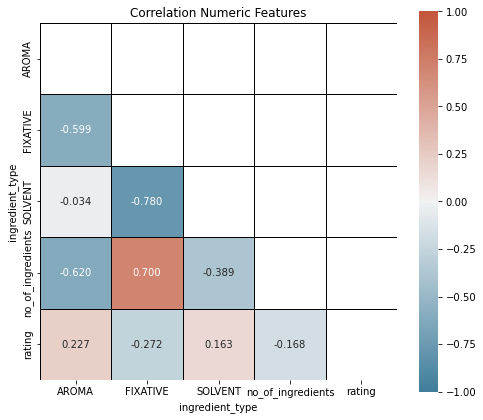

In [27]:
corr_df = df[numeric_features + [target]].corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr_df, dtype=bool))

fig, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(
    data=corr_df,
    mask=mask,
    cmap=cmap, 
    vmax=1.0, 
    vmin=-1.0,
    center=0,
    square=True, 
    linewidths=0.5, 
    linecolor='k',
    annot=True, 
    fmt='.3f',
    ax=ax
)
ax.set(title='Correlation Numeric Features');

### It can be observed that ingredient type SOLVENT & AROMA are highly correlated with rating[Target Variable], It can be a strong predictor.

In [28]:
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 100

 ### AROMA

<AxesSubplot:>

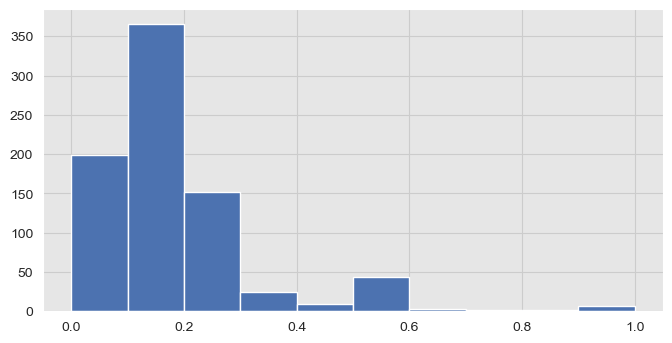

In [29]:
fig=plt.figure(figsize=(8,4))
ax=fig.gca()
df['AROMA'].hist(ax=ax)

<AxesSubplot:xlabel='rating', ylabel='AROMA'>

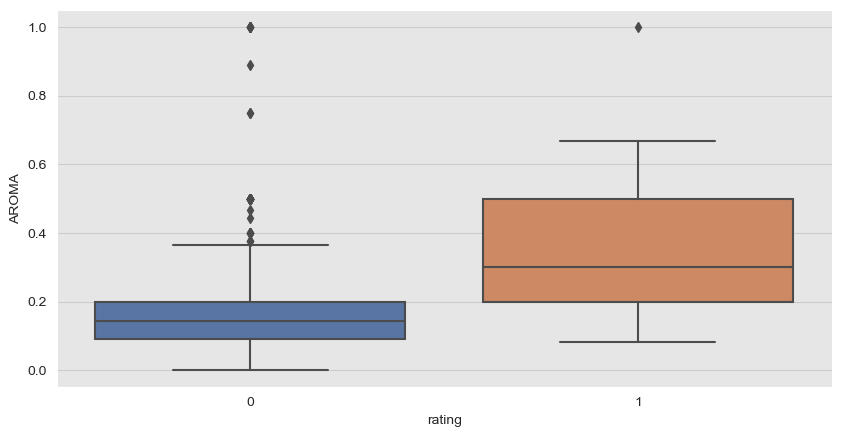

In [30]:
sns.boxplot(x="rating", y="AROMA", data=df)

### 75 % of perfume with good rating had more than 20 % ingredients of type Aroma, Though approx 75 % of perfume with bad rating had less than 20 % ingredients of type Aroma.

### FIXATIVE 

<AxesSubplot:xlabel='rating', ylabel='FIXATIVE'>

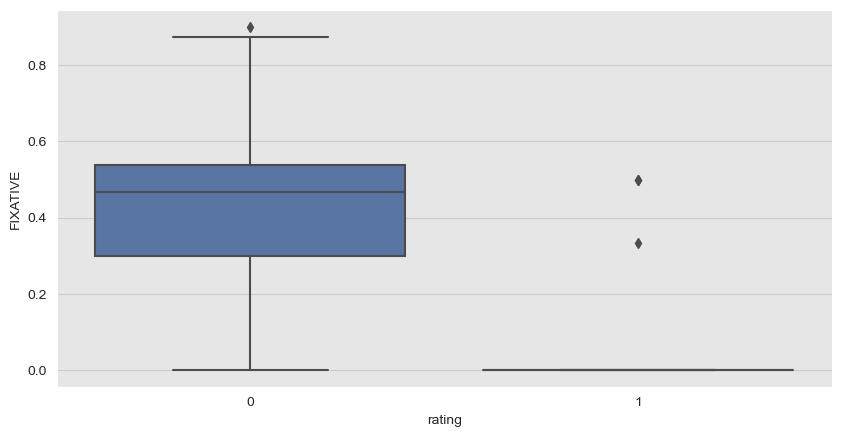

In [31]:
sns.boxplot(x="rating", y="FIXATIVE", data=df)

### There are very few products which are rated good with the ingredient type as FIXATIVE

### SOLVENT

<AxesSubplot:>

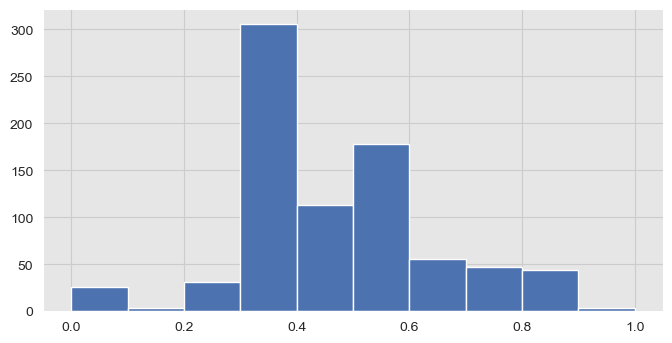

In [32]:
fig=plt.figure(figsize=(8,4))
ax=fig.gca()
df['SOLVENT'].hist(ax=ax)

<AxesSubplot:xlabel='rating', ylabel='SOLVENT'>

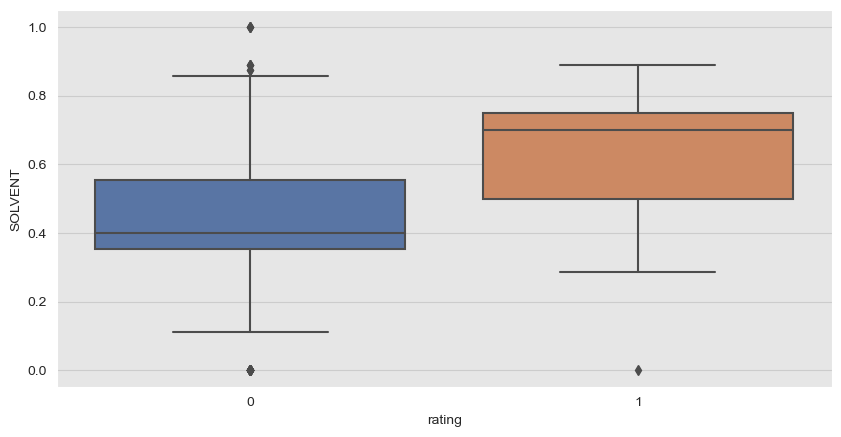

In [33]:
sns.boxplot(x="rating", y="SOLVENT", data=df)

### For a good rated perfume, approx 60 % of ingredients will be solvent type.

### No Of Ingredients

<AxesSubplot:>

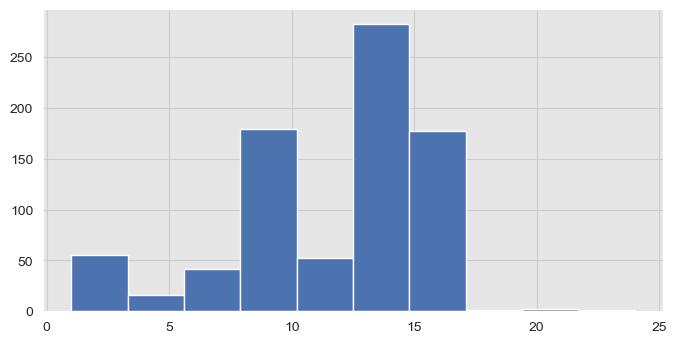

In [34]:
fig=plt.figure(figsize=(8,4))
ax=fig.gca()
df['no_of_ingredients'].hist(bins=10,ax=ax)

<AxesSubplot:xlabel='rating', ylabel='no_of_ingredients'>

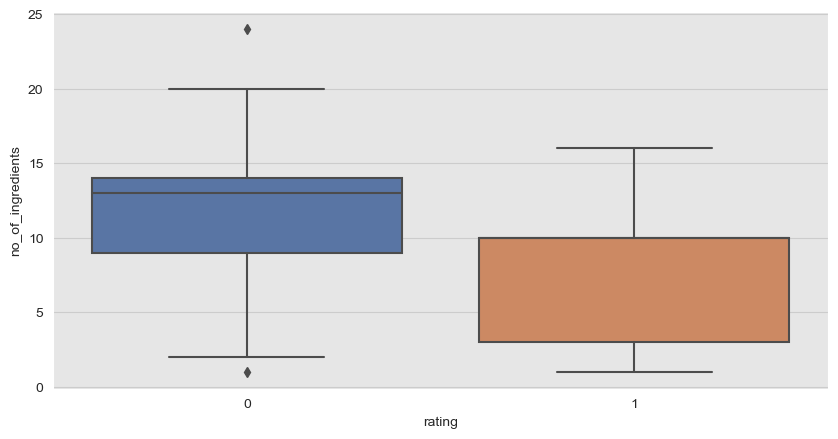

In [35]:
sns.boxplot(x="rating", y="no_of_ingredients", data=df)

### Simple perfumes with less no of (<10) ingredients are prefereed by customers.

# Categrical Features

## Perfume Base

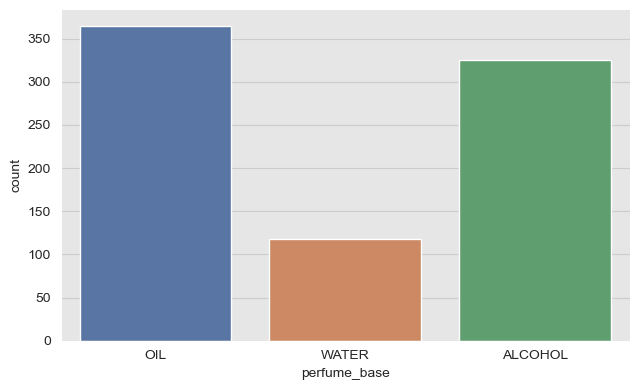

In [36]:
sns.catplot(x="perfume_base",kind='count', data=df,height=4,aspect=6.5/4)

<AxesSubplot:xlabel='perfume_base'>

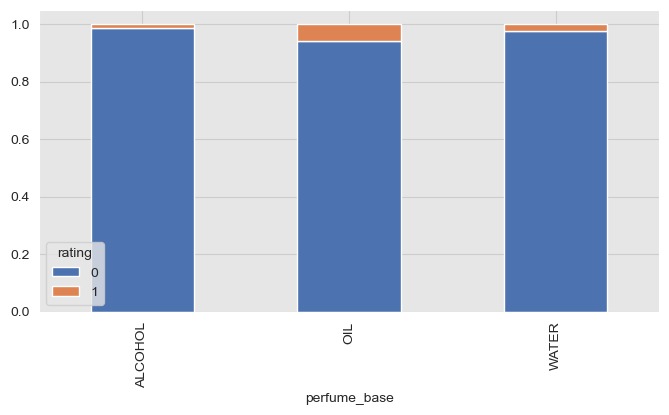

In [37]:
cross_tab=pd.crosstab(index=df['perfume_base'],columns=df['rating'],normalize='index')

cross_tab.plot(kind='bar',stacked=True,figsize=(8,4))

### Higher Percentage of Oil based perfumes are prefered the most by people followed by Water and then Alcohol based.

## fragrance

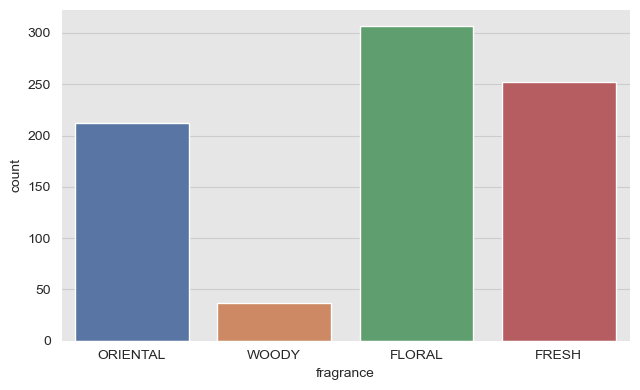

In [38]:
sns.catplot(x="fragrance",kind='count', data=df,height=4,aspect=6.5/4)

<AxesSubplot:xlabel='fragrance'>

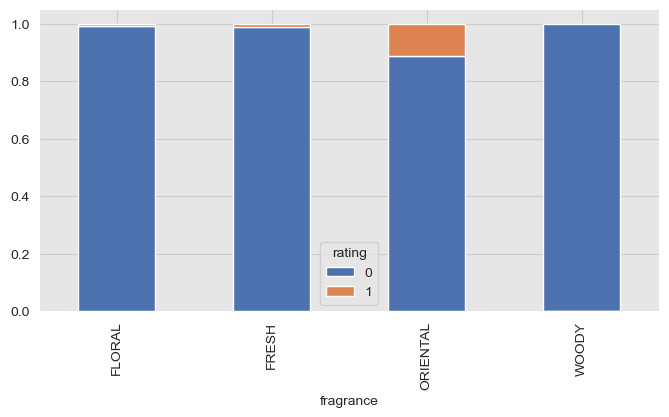

In [39]:
cross_tab=pd.crosstab(index=df['fragrance'],columns=df['rating'],normalize='index')

cross_tab.plot(kind='bar',stacked=True,figsize=(8,4))

### Perople are preferring the Oriental fragnance way more than other fragnances available. Its followed by FRESH, FLOARAL and lastly WOODY.

## Manufacture Plant

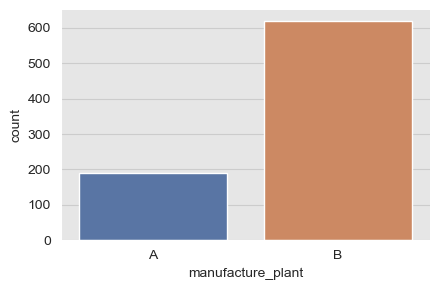

In [40]:
sns.catplot(x="manufacture_plant",kind='count', data=df,height=3,aspect=6/4)

<AxesSubplot:xlabel='manufacture_plant'>

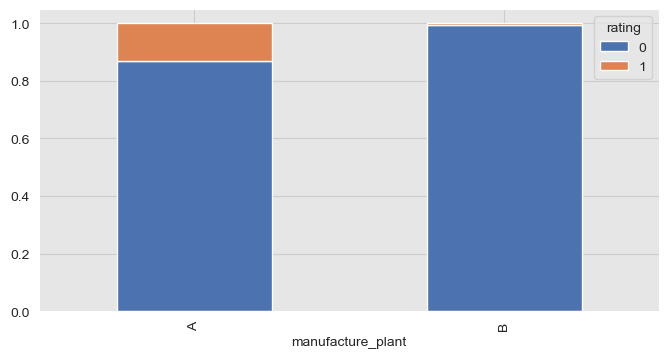

In [41]:
cross_tab=pd.crosstab(index=df['manufacture_plant'],columns=df['rating'],normalize='index')

cross_tab.plot(kind='bar',stacked=True,figsize=(8,4))

### The Most loved perfume were manufactured in Plant A.

# Modelling

## 1. Logistic Regression

## It Involves Preprocessing and then Modelling

In [42]:
df

ingredient_type,sample_id,perfume_base,fragrance,manufacture_plant,manufacture_date,rating,AROMA,FIXATIVE,SOLVENT,no_of_ingredients
0,A/260615/0,OIL,ORIENTAL,A,06/03/2020 4:19,0,0.166667,0.000000,0.833333,6
1,A/260617/0,OIL,ORIENTAL,A,06/03/2020 4:22,0,0.166667,0.000000,0.833333,6
2,A/260646/0,WATER,WOODY,A,06/03/2020 5:02,0,0.076923,0.384615,0.538462,13
3,A/260655/0,WATER,WOODY,A,06/03/2020 5:09,0,0.076923,0.384615,0.538462,13
4,A/261787/0,WATER,WOODY,A,10/03/2020 7:42,0,0.062500,0.437500,0.500000,16
...,...,...,...,...,...,...,...,...,...,...
803,B/449588/0,OIL,FRESH,B,23/02/2021 8:06,0,0.142857,0.500000,0.357143,14
804,B/450082/0,OIL,FRESH,B,23/02/2021 17:59,0,0.142857,0.500000,0.357143,14
805,B/451633/0,WATER,FRESH,B,25/02/2021 12:00,0,0.500000,0.000000,0.500000,2
806,B/451954/0,OIL,FRESH,B,25/02/2021 21:49,0,0.142857,0.500000,0.357143,14


In [43]:
df.columns

Index(['sample_id', 'perfume_base', 'fragrance', 'manufacture_plant',
       'manufacture_date', 'rating', 'AROMA', 'FIXATIVE', 'SOLVENT',
       'no_of_ingredients'],
      dtype='object', name='ingredient_type')

In [68]:
df.shape

(808, 10)

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer

categorical_transformer = Pipeline([('one_hot', OneHotEncoder(handle_unknown="ignore"))])
preprocessor = ColumnTransformer(transformers=[("cat", categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[("preprocessor", preprocessor), ("lr_classifier", LogisticRegression(max_iter=100))])

X_train, X_test, y_train, y_test = train_test_split(df[numeric_features+categorical_features], df[[target]]
                                                    , test_size=0.30, random_state=34,stratify=df[target])


clf.fit(X_train, y_train)
print(f"Model score: {clf.score(X_train, y_train)}")

Model score: 0.9646017699115044


C:\Users\mdnaiya\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
X_train.shape
# , X_test, y_train, y_test

(565, 7)

In [45]:
y_pred = clf.predict(X_test)
print(f"Accuracy of logistic regression classifier on test set: {clf.score(X_test, y_test)}")

Accuracy of logistic regression classifier on test set: 0.9629629629629629


In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[234   0]
 [  9   0]]


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       234
           1       0.00      0.00      0.00         9

    accuracy                           0.96       243
   macro avg       0.48      0.50      0.49       243
weighted avg       0.93      0.96      0.94       243



C:\Users\mdnaiya\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mdnaiya\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mdnaiya\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

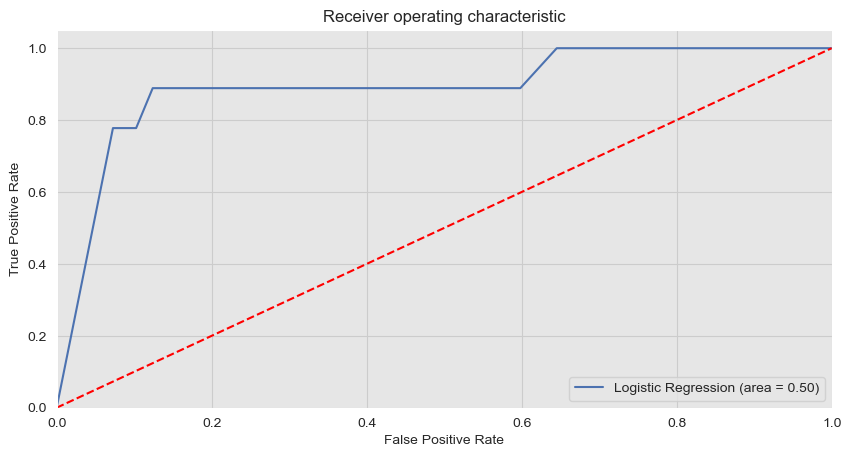

In [48]:
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# PDP Plots

## Numerical Features

### AROMA

C:\Users\mdnaiya\AppData\Roaming\Python\Python39\site-packages\sklearn\inspection\_plot\partial_dependence.py:1110: UserWarning: Attempting to set identical bottom == top == 0.03539893812740217 results in singular transformations; automatically expanding.
  ax.set_ylim(self.pdp_lim[1])


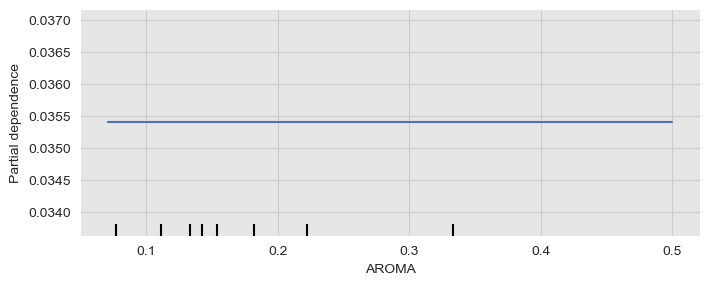

In [49]:
features_to_display=['AROMA']
fig,ax=plt.subplots(figsize=(8,3))
PartialDependenceDisplay.from_estimator(clf,
                                            X=X_train,
                                            features=features_to_display,
                                            kind='average',
                                            subsample=50,
                                            n_jobs=3,
                                            grid_resolution=20,
                                            random_state=42,
                                            ax=ax)

### Owing to less number of records we dont see much deviation through the graphs

## Categorical Features

In [50]:
def get_column_names_from_ColumnTransformer(column_transformer):    
    col_name = []

    for transformer_in_columns in column_transformer.transformers_[:-1]: #the last transformer is ColumnTransformer's 'remainder'
        print('\n\ntransformer: ', transformer_in_columns[0])
        
        raw_col_name = list(transformer_in_columns[2])
        
        if isinstance(transformer_in_columns[1], Pipeline): 
            # if pipeline, get the last transformer
            transformer = transformer_in_columns[1].steps[-1][1]
        else:
            transformer = transformer_in_columns[1]
            
        try:
          if isinstance(transformer, OneHotEncoder):
            names = list(transformer.get_feature_names(raw_col_name))
            
          elif isinstance(transformer, SimpleImputer) and transformer.add_indicator:
            missing_indicator_indices = transformer.indicator_.features_
            missing_indicators = [raw_col_name[idx] + '_missing_flag' for idx in missing_indicator_indices]

            names = raw_col_name + missing_indicators
            
          else:
            names = list(transformer.get_feature_names())
          
        except AttributeError as error:
          names = raw_col_name
        
        print(names)    
        
        col_name.extend(names)
            
    return col_name

In [51]:
# preprocessing
preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# building a valid DataFrame for pdpbox
feature_names = get_column_names_from_ColumnTransformer(preprocessor)
X_test_transformed_pd = pd.DataFrame(X_test_transformed, columns=feature_names)



transformer:  cat
['perfume_base_ALCOHOL', 'perfume_base_OIL', 'perfume_base_WATER', 'fragrance_FLORAL', 'fragrance_FRESH', 'fragrance_ORIENTAL', 'fragrance_WOODY', 'manufacture_plant_A', 'manufacture_plant_B']


C:\Users\mdnaiya\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [70]:
X_test_transformed_pd

,perfume_base_ALCOHOL,perfume_base_OIL,perfume_base_WATER,fragrance_FLORAL,fragrance_FRESH,fragrance_ORIENTAL,fragrance_WOODY,manufacture_plant_A,manufacture_plant_B
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
238,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
239,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
240,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
241,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## 2. Random Forest

In [55]:
random_forest = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=10)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
rf = Pipeline(steps=[("preprocessor", preprocessor), ("rf_classifier", random_forest)])

rf.fit(X_train, y_train)
print(f"model score: {rf.score(X_train, y_train)}")

model score: 0.9646017699115044


C:\Users\mdnaiya\AppData\Roaming\Python\Python39\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [56]:
y_pred = rf.predict(X_test)
print(f"Accuracy of Random Forest regression classifier on test set:{rf.score(X_test, y_test)}")

Accuracy of Random Forest regression classifier on test set:0.9629629629629629


In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[234   0]
 [  9   0]]


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       234
           1       0.00      0.00      0.00         9

    accuracy                           0.96       243
   macro avg       0.48      0.50      0.49       243
weighted avg       0.93      0.96      0.94       243



C:\Users\mdnaiya\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mdnaiya\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mdnaiya\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

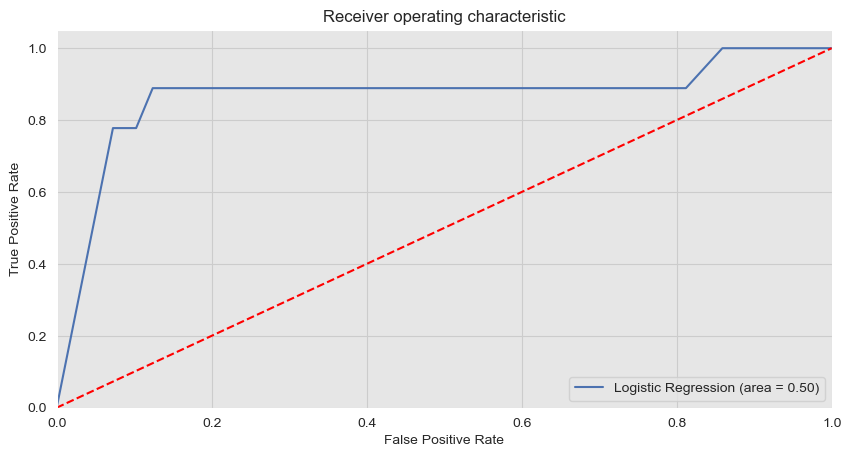

In [59]:
logit_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## 3. GBM

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.

gradient_boosting = GradientBoostingClassifier(n_estimators=10, max_depth=3, random_state=10)

gb = Pipeline(steps=[("preprocessor", preprocessor), ("gbm_classifier", gradient_boosting)])

gb.fit(X_train, y_train)
print(f"model score: {gb.score(X_train, y_train)}")

model score: 0.9646017699115044


C:\Users\mdnaiya\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
y_pred = gb.predict(X_test)
print(f"Accuracy of GBM regression classifier on test set:{gb.score(X_test, y_test)}")

Accuracy of GBM regression classifier on test set:0.9629629629629629


In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[234   0]
 [  9   0]]


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       234
           1       0.00      0.00      0.00         9

    accuracy                           0.96       243
   macro avg       0.48      0.50      0.49       243
weighted avg       0.93      0.96      0.94       243



C:\Users\mdnaiya\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mdnaiya\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mdnaiya\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

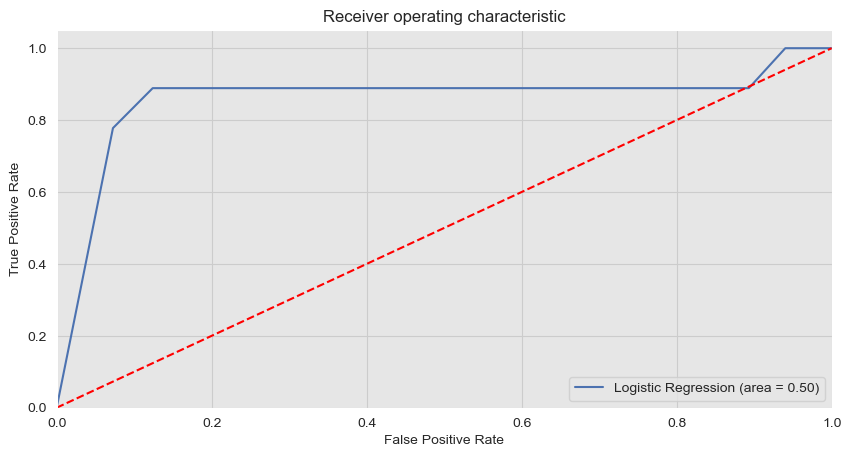

In [64]:
logit_roc_auc = roc_auc_score(y_test, gb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [65]:
model=gb.named_steps['gbm_classifier']
importances = model.feature_importances_

### Feature Importance

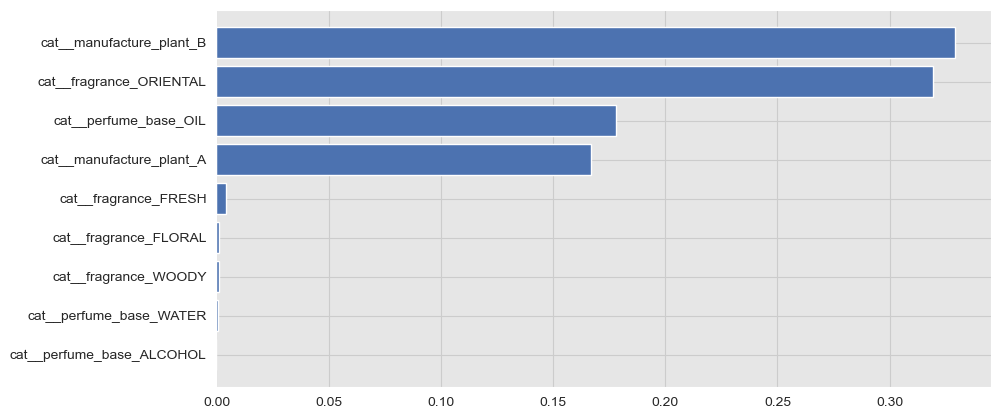

In [66]:
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(gb.steps[0][1].get_feature_names_out())[indices])


## AUC Curve for all the Models.

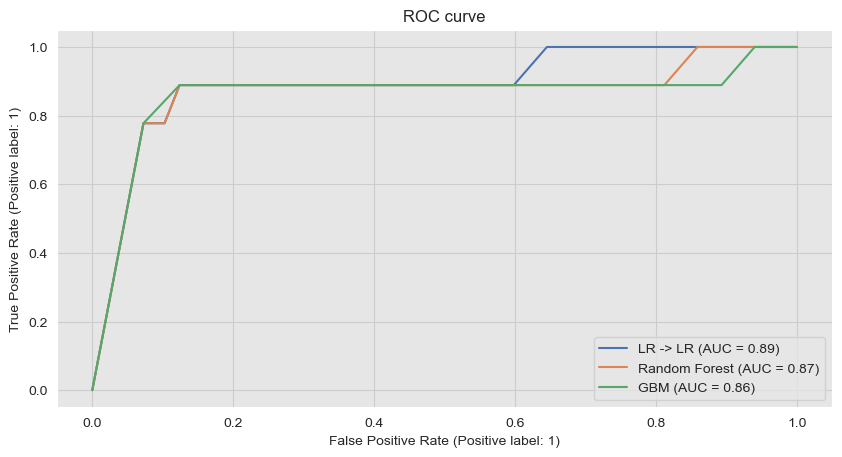

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()

models = [
    ("LR -> LR", clf),
    ("Random Forest", rf),
    ("GBM", gb),
]

model_displays = {}
for name, pipeline in models:
    model_displays[name] = RocCurveDisplay.from_estimator(
        pipeline, X_test, y_test, ax=ax, name=name
    )
_ = ax.set_title("ROC curve")